<a href="https://colab.research.google.com/github/Arvindkale123/global-terrorism-exploratory-data-analysis/blob/main/Global_Terrorism_Analysis_11_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

The best quote which inspires is the famous quote by Alvin Toffler(American writer)  
##**"You can use all the quantitive data you can get,but you still have to distrust it and use your own intelligence and judgement**" 

Following are the things we analyzed in our project and plotted the graphs with the help of Matplot library for proper visualization and understanding of the data

Importance of Data Visualization

 In Data analysis, we can take all of the complex relationships that we have been focusing on in our analysis and puts them in a graph format, or at least in another visual format that is easier to look through.

Sometimes, looking at all of those numbers and figures can be boring and really hard to concentrate on. It can take a long time for us to figure out what relationships are present, and which ones are something that we should ignore. But when we put the information into some kind of graph form, such as a graph, a chart, or something similar, then we will be able to easily see some of the complex relationships that show up, and the information will make more sense overall.

Following are the things we analyzed in our project and plotted the graphs with the help of Matplot library for proper visualization and understanding of the data
* ploting the chart of casualities yearwise(1970-2017)
* number of attack country wise
* country wise casualities till now
* total number of attack by type of attack
* city wise deaths
* terrorist activities by group like taliban
* most targeted group till now
* ransom collected country wise




In [1]:
# importing numpy and pands library 
import numpy as pd
import pandas as pd

In [2]:
# importing matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# reading the csv file from drive
df=pd.read_csv('//content/drive/MyDrive/Global Terrorism Data.csv', encoding = "ISO-8859-1", engine='python')

In [5]:
# printing  the head of csv to lookup at the data
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
# Keeping required columns and removing unwanted columns
columns_required = ['iyear','country_txt','region_txt','city','attacktype1_txt','targtype1_txt','ransomamt','gname','nkill']

In [6]:
# Creating new df required for analysis
new_df = df[columns_required].copy()

In [7]:
new_df.head()

,iyear,country_txt,region_txt,city,attacktype1_txt,targtype1_txt,ransomamt,gname,nkill
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,NaN,MANO-D,1.0
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),800000.0,23rd of September Communist League,0.0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,NaN,Unknown,1.0
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),NaN,Unknown,NaN
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),NaN,Unknown,NaN


In [8]:
# Renaming the columns
new_df.rename(columns = {'iyear':'year','country_txt':'country','region_txt':'region','attacktype1_txt':'attack_type','targtype1_txt':'target_type','ransomamt':'ransom','gname':'gang_name','nkill':'people_killed'}, inplace = True)

In [10]:
new_df.isnull().sum()

year                  0
country               0
region                0
city                434
attack_type           0
target_type           0
ransom           180341
gang_name             0
people_killed     10313
dtype: int64

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           181691 non-null  int64  
 1   country        181691 non-null  object 
 2   region         181691 non-null  object 
 3   city           181257 non-null  object 
 4   attack_type    181691 non-null  object 
 5   target_type    181691 non-null  object 
 6   ransom         1350 non-null    float64
 7   gang_name      181691 non-null  object 
 8   people_killed  171378 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 12.5+ MB


In [10]:
# Filling NaN values of ransom and people killed

new_df['people_killed'] = new_df['people_killed'].fillna(0)

mean = new_df['ransom'].mean()
new_df['ransom'].fillna(value=mean, inplace=True)

In [11]:
# storing data for year wise killed
year_killed_df = new_df[['year','people_killed']]

In [12]:
# Grouping the data by year wise killed and applying sum aggregate
year_killed_df = year_killed_df.groupby('year')['people_killed'].sum()

In [ ]:
year_killed_df.head()

year
1970    174.0
1971    173.0
1972    566.0
1973    370.0
1974    539.0
Name: people_killed, dtype: float64


# Let us first understand what is terrorism??

We often hear the word “terrorism”, “terrorist” or “suicide bombing”, but do we know what these nuanced terms actually mean? ‘Terrorism’ was the most searched word in the year 2018, as per dictionary.com which shows the eagerness among the people to know about it. Terrorism is a strategic weapon which is used to create fear, violence and terror among the masses of people by adversaries who are weaker & smaller to compel a much larger force to do their bidding.

Cases of suicide bombing occur in a wide range all over the world. In the recent case of a suicide bombing at Sri Lanka where nine suicide bombers from a well-off family targeted the masses of people & Churches on Easter. All these nine suicide bombers were well settled in their lives and practised the professions of lawyer, aerospace engineer, NTJ member and three of them were sons and daughters-in-law of famous businessman Y.M.Ibrahim, Chairman of a decade-old Spice Export Company – Ishana Export. On February 14, 2019, a convoy of vehicles carrying 40 Central Reserved Police Force Personnel was attacked by a vehicle-borne suicide bomber in the Pulwama District of Jammu & Kashmir, India.

Understanding the Data:
 the data consists of the various columns let us understand few of them.


*   **attack type** ▶ this column consist the type of attack like assasination , bombing , explosion
*   **Target type** ▶ the target typre like pprivate property or public property , citizen or etc
*   **Ransom** ▶ it is the ransom amount collected by the attacker 
*   **gang**   ▶ it is the gang which did the attack 



## lets begin the analysis

# 1.Top 10 years of casualities
In the bar graph below we can clearly see that **2014** was the  deadliest year followed by 2015 and 2016 from the period between **1970-2017**. on the x-axis year plotted with respect to the number of casualities on y-axis.

In [ ]:
# Number of casualties each year
new_df.groupby('year')['people_killed'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',xlabel='YEAR',ylabel='NUMBER OF CASUALTIES',title='NUMBER OF CASUALTIES EACH YEAR',rot=0,figsize=(15,8),ylim=(0,45000),color='red')

# 2.Top 15 countries with highest Number of attack 
 The following bar graph shows the number of attack that top conutries faced . the numbe of attacks are plotted on y-axis and country is plotted on the x-axis. **Iraq** has faced most number of attacks followed by pakistan , afganistan and india. All these top affected countries belong to the **asian continent** . so we can say asian continet is most affected by terrorist attacks.

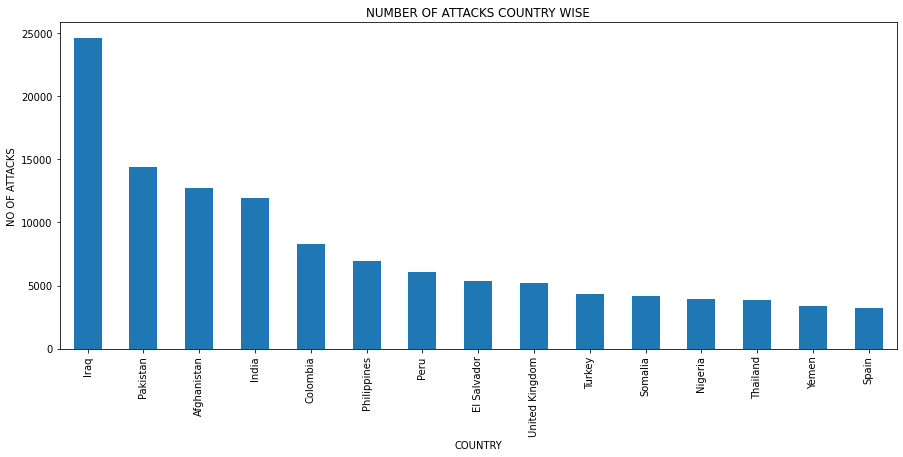

In [27]:
# Number of attacks country wise

new_df.groupby('country')['country'].count().sort_values(ascending=False)[0:15].plot.bar(xlabel='COUNTRY',ylabel='NO OF ATTACKS',title='NUMBER OF ATTACKS COUNTRY WISE',figsize=(15,6))

# 3. Region wise terror attacks
The below line graph shows the number of attacks by region in descending order. The number of attacks by region are plotted on y-axis and region in which that happened is plotted on the x-axis. Middle east and north africa the most affected region overall from the data.

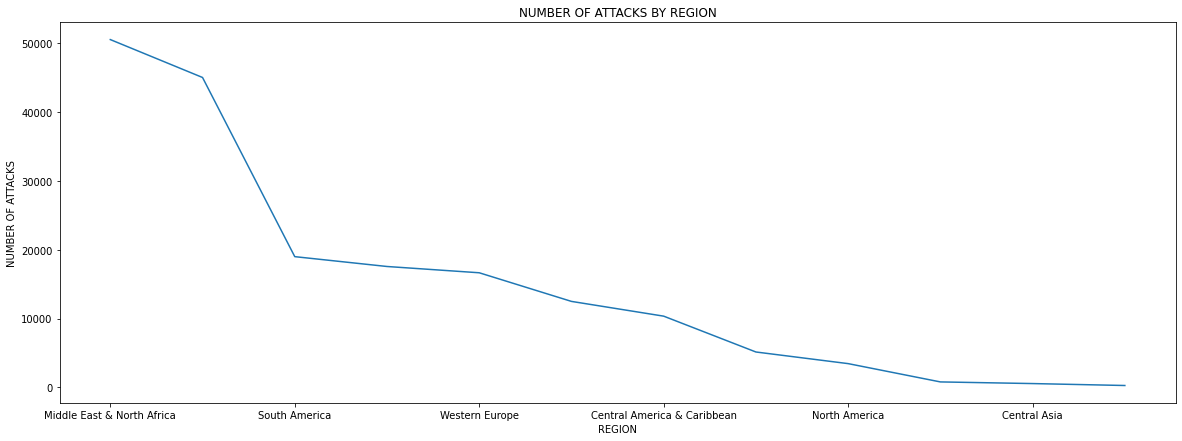

In [26]:
# Region wise terrorist activities

new_df.groupby('region')['region'].count().sort_values(ascending=False).plot.line(xlabel='REGION',ylabel='NUMBER OF ATTACKS',title='NUMBER OF ATTACKS BY REGION',rot=0,figsize=(20,7))

# 4. countries with highest casualities
The  bar graph shows the coutry which has the highest number of casualities clearly iraq leads the with near to 80 thousand deaths followed by afganistan and pakistan.Number of caualities are plotted on y-axis while country are plotted on x-axis

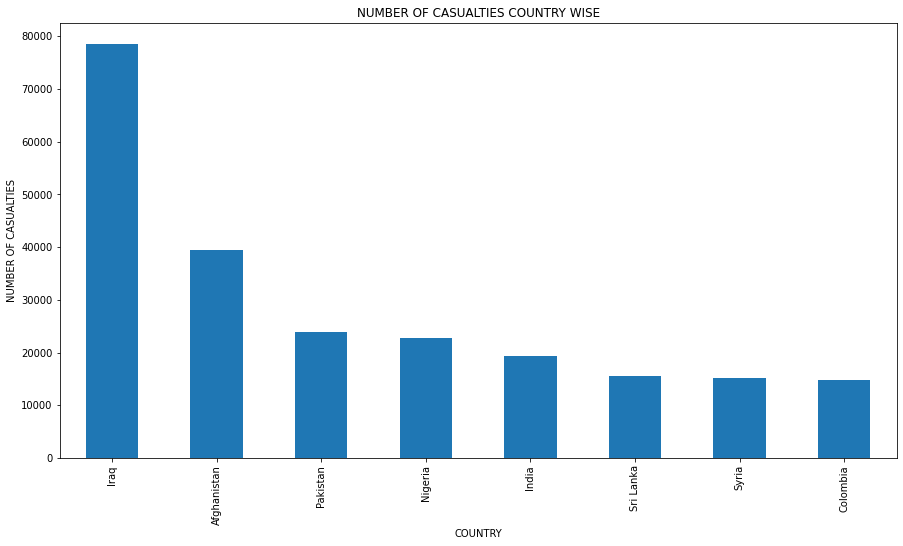

In [ ]:
# Country wise casualties bar graph

new_df.groupby('country')['people_killed'].sum().sort_values(ascending=False)[0:8].plot.bar(xlabel='COUNTRY',ylabel='NUMBER OF CASUALTIES',title='NUMBER OF CASUALTIES COUNTRY WISE',figsize=(15,8))

# 5. Total attacks by type of attack 
The following pie chart gives percentage of type of attack like which was the most preffered type of attack by the terrorrist .As we can see from the pie that bombing/explosion is the mostly used with **50 %** used of all types followed by armed assault**(25%)** and assasination **(11%)**.

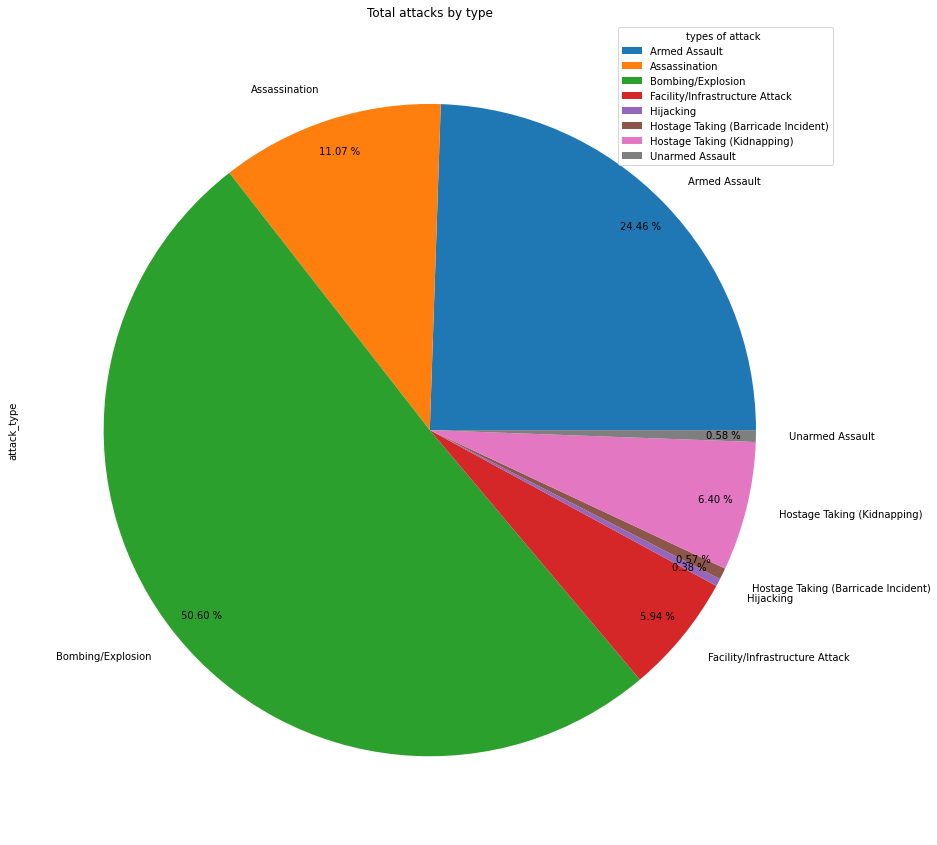

In [28]:
# Total attack by type of attack
index_unknown_type = new_df[(new_df['attack_type']=='Unknown')].index
attack_type_df = new_df.drop(index_unknown_type)

attack_type_df.groupby('attack_type')['attack_type'].count().plot.pie(title='Total attacks by type',figsize=(18,15),fontsize=10,autopct='%.2f %%',pctdistance=0.9)
plt.legend(title='types of attack ')

# 6. The  cities with highest number of deaths
It is very unfortunate to sau that baghdas city highest toll close to 22 thousand deaths and followed by city of mosul close to 75 hundred deaths .Both of these cities are located in iraq.Third is the city of mogadishu in somalia with almost 45 hundred deaths.

In [ ]:
new_df.dropna(inplace=True)

In [ ]:
new_df['people_killed'] = new_df['people_killed'].astype(int)

In [ ]:
# City wise deaths
index_nill_death = new_df[(new_df['people_killed'] == 0)].index

city_df = new_df.drop(index_nill_death)


In [ ]:
index_unknown_city = new_df[(new_df['city']=='Unknown')].index
city_df = new_df.drop(index_unknown_city)

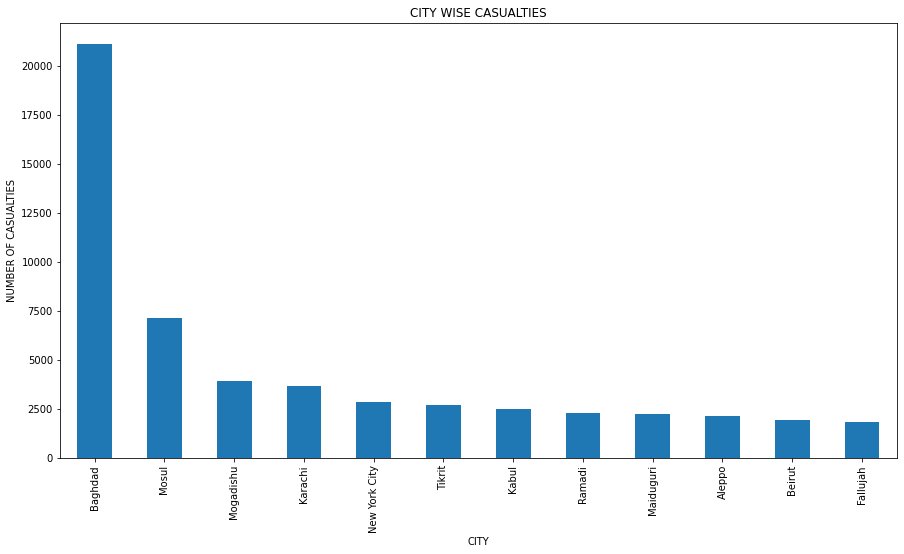

In [ ]:
city_df.groupby('city')['people_killed'].sum().sort_values(ascending=False)[:12].plot.bar(xlabel='CITY',ylabel='NUMBER OF CASUALTIES',title='CITY WISE CASUALTIES',figsize=(15,8))

# 7. total attack by the type of organisation 
 The taliban had did the highest number of attacks and second highest is by the islamic state of iraq and levant .Taliban has done near to 7000 attacks . The number of attack are plotted on y-axis and on x-axis is plotted  terrorist groups.
 

In [ ]:
# Terrorist activities by Groups

index_gang = new_df[(new_df['gang_name'] == 'Unknown')].index

gang_df = new_df.drop(index_gang)

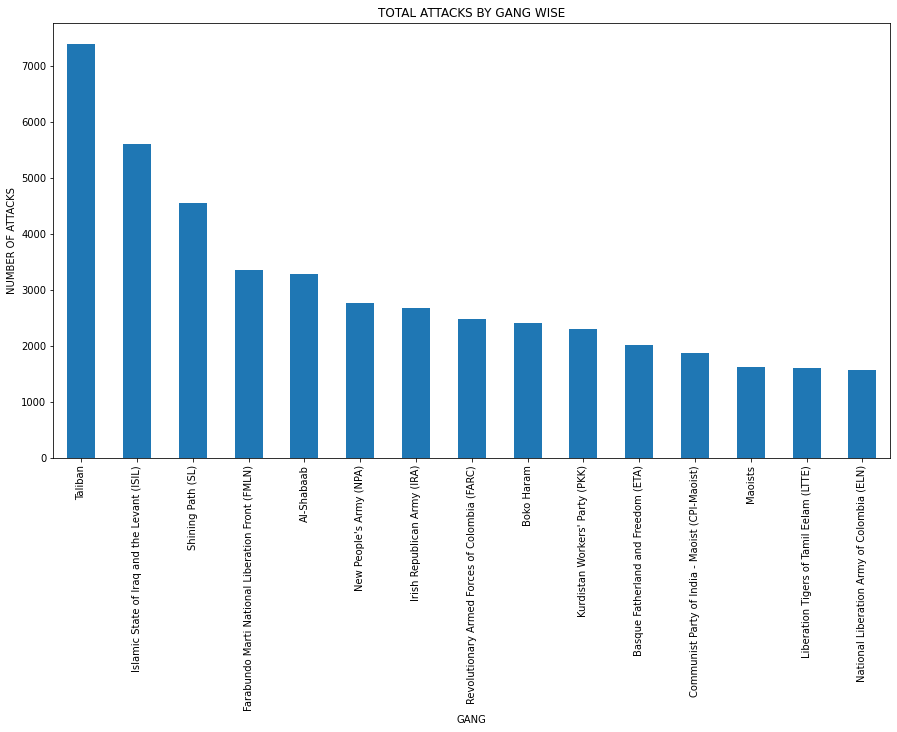

In [ ]:
gang_df.groupby('gang_name')['gang_name'].count().sort_values(ascending=False)[:15].plot.bar(xlabel='GANG',ylabel='NUMBER OF ATTACKS',title='TOTAL ATTACKS BY GANG WISE',figsize=(15,8),rot=90)

# 8. Most targeted places 
The most targeted place was the private citizens and the property 

In [ ]:
# Target type attacks
index_target = new_df[(new_df['target_type'] == 'Unknown')].index

target_df = new_df.drop(index_target)

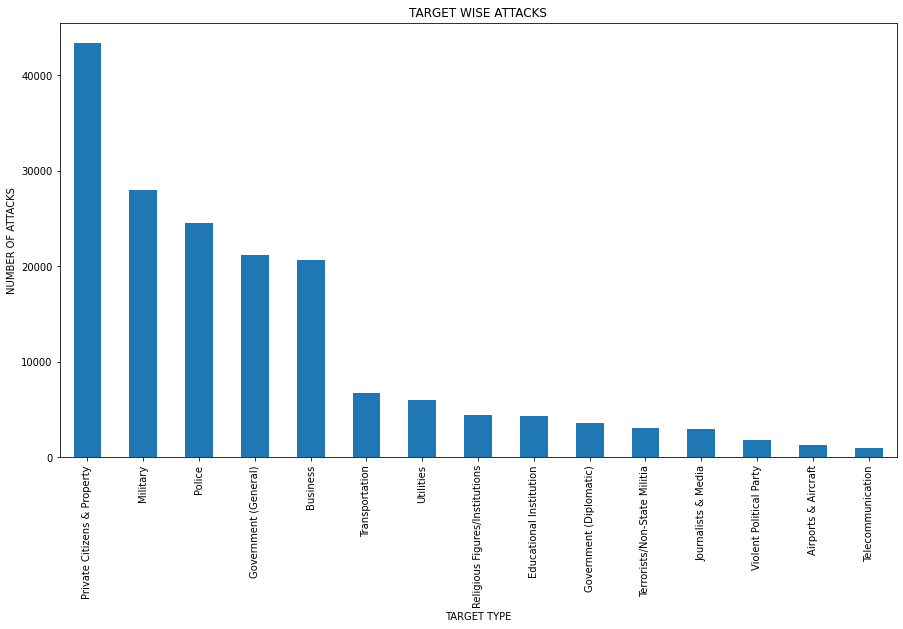

In [ ]:
target_df.groupby('target_type')['target_type'].count().sort_values(ascending=False)[:15].plot.bar(xlabel='TARGET TYPE',ylabel='NUMBER OF ATTACKS',title='TARGET WISE ATTACKS',figsize=(15,8))

# 9. Countries from  which highest ransom  is collected
The iraq almost gave dollar 8 billion in ransom which 35 % percent all the ransom collected  . pakistan comes secomd with 20% of the total ransom collected followed by afganistan with close to 18 % of the total ransom collected. 

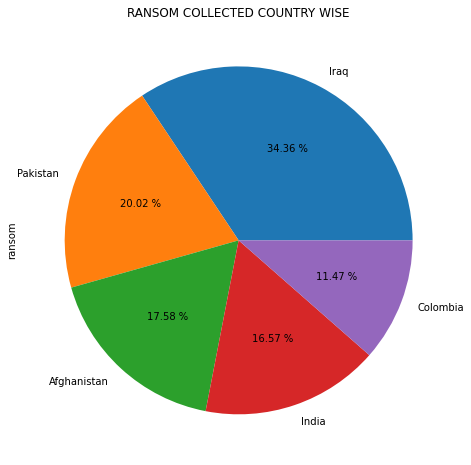

In [ ]:
#Ransom collected country wise

new_df.groupby('country')['ransom'].sum().sort_values(ascending=False)[:5].plot.pie(title='RANSOM COLLECTED COUNTRY WISE',figsize=(15,8), autopct='%.2f %%')

#  conclusion 

---
* year with highest causalities: **2014**
* country with highest number of attack: **Iraq**
* country with highest casualities : **Iraq**
* mosy prefered way of attack   : **Bombing/ explosion** 
* city with highest number of  deaths : **Baghdad** 
* Highest number of attack by a group: **Taliban**
* most targeted group till now : **private citizen** 
* Country from which highest ransom  is collected: **Iraq**

 From the above data we can see that Iraq is leading in most of the indiacators 
 why is that so ?
 The reaon is Iraq war  
 But what is iraq war??
 
 **The Iraq War was a protracted armed conflict from 2003 to 2011 that began with the invasion of Iraq by the United States–led coalition which overthrew the Iraqi government of Saddam Hussein. The conflict continued for much of the next decade as an insurgency emerged to oppose the coalition forces and the post-invasion Iraqi government. An estimated(not in data) 151,000 to 1,033,000 Iraqis died in the first three to five years of conflict. US troops were officially withdrawn in 2011. The United States became re-involved in 2014 at the head of a new coalition and the insurgency and many dimensions of the armed conflict continue today. The invasion occurred as part of the George W. Bush administration's War on Terror following the September 11 attacks despite no connection of the latter to Iraq.** (source- wikipedia)







